In [1]:
!pip install catboost scikit-optimize

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import kagglehub

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, RobustScaler

In [3]:
path = kagglehub.dataset_download("khusheekapoor/vehicle-insurance-fraud-detection")

print(path)

100%|██████████| 349k/349k [00:00<00:00, 18.6MB/s]

Extracting files...
/root/.cache/kagglehub/datasets/khusheekapoor/vehicle-insurance-fraud-detection/versions/1


In [4]:
!ls /root/.cache/kagglehub/datasets/khusheekapoor/vehicle-insurance-fraud-detection/versions/1

carclaims.csv


In [5]:
df = pd.read_csv(path + "/carclaims.csv")
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No


In [6]:
df["PastNumberOfClaims"][:5]

,PastNumberOfClaims
0,none
1,none
2,1
3,1
4,none


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  PolicyNumber          15420 non-null

In [8]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Month,15420,12,Jan,1411,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WeekOfMonth,15420.0,NaN,NaN,NaN,2.788586,1.287585,1.0,2.0,3.0,4.0,5.0
DayOfWeek,15420,7,Monday,2616,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Make,15420,19,Pontiac,3837,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AccidentArea,15420,2,Urban,13822,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DayOfWeekClaimed,15420,8,Monday,3757,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MonthClaimed,15420,13,Jan,1446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WeekOfMonthClaimed,15420.0,NaN,NaN,NaN,2.693969,1.259115,1.0,2.0,3.0,4.0,5.0
Sex,15420,2,Male,13000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MaritalStatus,15420,4,Married,10625,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.isna().sum()

,0
Month,0
WeekOfMonth,0
DayOfWeek,0
Make,0
AccidentArea,0
DayOfWeekClaimed,0
MonthClaimed,0
WeekOfMonthClaimed,0
Sex,0
MaritalStatus,0


In [10]:
# Fraud ratio
df["FraudFound"].value_counts(normalize=True)

,proportion
FraudFound,
No,0.940143
Yes,0.059857


In [11]:
# plt.figure(figsize=(14, 10))
# correlation_matrix = df.corr()
# sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm")
# plt.title("Correlation matrix")
# plt.show()

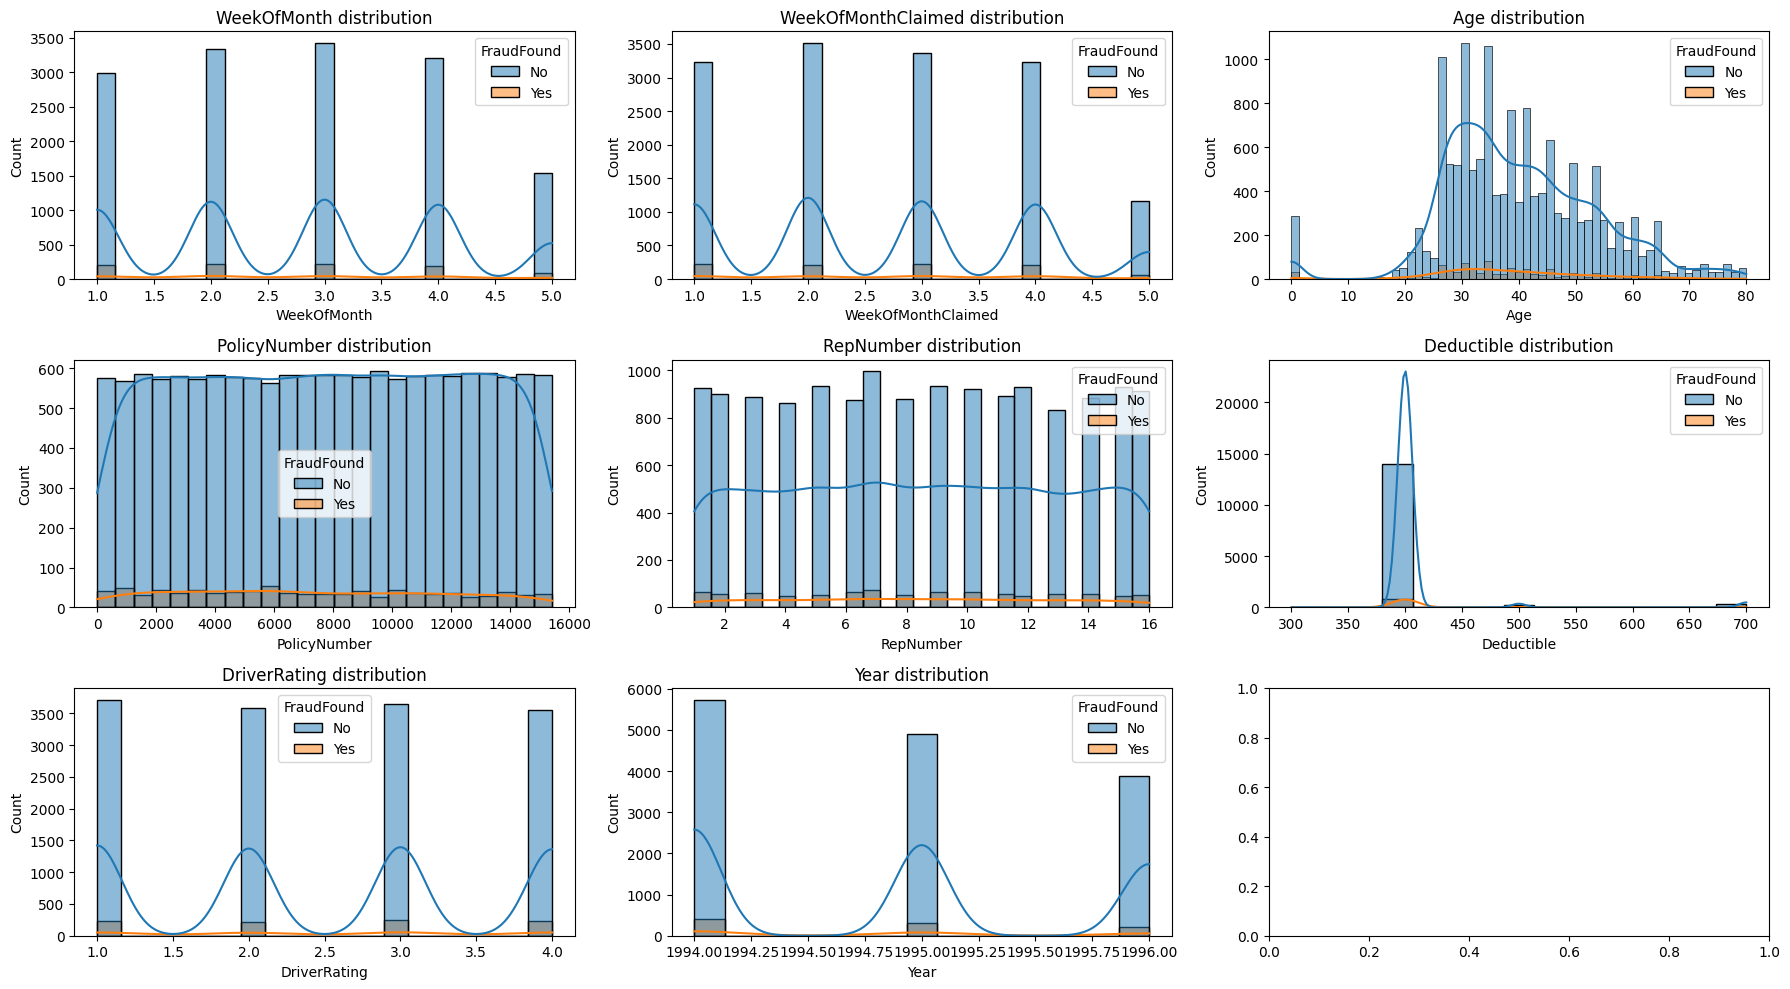

In [12]:
numerical_features = df.select_dtypes(include=["int64", "float64"]).columns
fig, axes = plt.subplots(nrows = len(numerical_features) // 3 + 1, ncols=3, figsize=(18, 4 * len(numerical_features) // 3))
for i, feature in enumerate(numerical_features):
    row, col = i // 3, i % 3
    sns.histplot(data=df, x=feature, hue="FraudFound", ax=axes[row, col], kde=True)
    axes[row, col].set_title(f"{feature} distribution")
plt.tight_layout()
plt.show()

Features decoding

In [13]:
MONTH_TO_NUM = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
df["Month"] = df["Month"].apply(lambda x: MONTH_TO_NUM.index(x) + 1)
# df["MonthClaimed"] = df["MonthClaimed"].apply(lambda x: None if x not in MONTH_TO_NUM else MONTH_TO_NUM.index(x) + 1)
df["MonthClaimed"] = df["MonthClaimed"].apply(lambda x: 0 if x not in MONTH_TO_NUM else MONTH_TO_NUM.index(x) + 1)

DAY_TO_NUM = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df["DayOfWeek"] = df["DayOfWeek"].apply(lambda x: DAY_TO_NUM.index(x) + 1)
# df["DayOfWeekClaimed"] = df["DayOfWeekClaimed"].apply(lambda x: None if x not in DAY_TO_NUM else DAY_TO_NUM.index(x) + 1)
df["DayOfWeekClaimed"] = df["DayOfWeekClaimed"].apply(lambda x: 0 if x not in DAY_TO_NUM else DAY_TO_NUM.index(x) + 1)

df["Sex"] = df["Sex"].map({"Male": 1, "Female": 0})
df["MaritalStatus"] = df["MaritalStatus"].map({"Single": 0, "Married": 1, "Widow": 2, "Divorced": 3})

df["IsHolderFault"] = df["Fault"].map({"Policy Holder": 1, "Third Party": 0})
df.drop(["Fault"], axis=1, inplace=True)

df["PoliceReportFiled"] = df["PoliceReportFiled"].map({"Yes": 1, "No": 0})
df["WitnessPresent"] = df["WitnessPresent"].map({"Yes": 1, "No": 0})

df["AgentType"] = df["AgentType"].map({"External": 1, "Internal": 0})

# Фича от банка - больше 4 аварий = фрод (по PastNumberOfClaims)

df["FraudFound"] = df["FraudFound"].map({"Yes": 1, "No": 0})

New features using LR

In [14]:
y = df["FraudFound"]
df.drop("FraudFound", axis=1, inplace=True)

categorical_features = df.select_dtypes(include=["object"]).columns

onehot_encoder = OneHotEncoder(drop="first", sparse_output=False)
one_hot_encoded = onehot_encoder.fit_transform(
    df[categorical_features]
    )

one_hot_df = pd.DataFrame(
    one_hot_encoded,
    columns=onehot_encoder.get_feature_names_out(categorical_features)
    )

numerical_features = df.select_dtypes(exclude=["object"]).columns
df_processed = pd.concat([df[numerical_features], one_hot_df], axis=1)

In [15]:
standard_scaler = StandardScaler()
robust_scaler = RobustScaler()

numerical_features_to_scale = df_processed.select_dtypes(include=["int64", "float64"]).columns
df_processed[numerical_features_to_scale] = standard_scaler.fit_transform(df_processed[numerical_features_to_scale])

Preprocessing of disbalance in the classes

In [16]:
df_processed.head()

,Month,WeekOfMonth,DayOfWeek,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,PolicyNumber,...,AddressChange-Claim_2 to 3 years,AddressChange-Claim_4 to 8 years,AddressChange-Claim_no change,AddressChange-Claim_under 6 months,NumberOfCars_2 vehicles,NumberOfCars_3 to 4,NumberOfCars_5 to 8,NumberOfCars_more than 8,BasePolicy_Collision,BasePolicy_Liability
0,1.614871,1.717545,-0.408142,-0.569781,-1.545403,-1.345408,-2.317736,-1.443856,-1.397554,-1.731938,...,-0.138689,-0.20656,-3.615155,-0.016108,-0.219534,6.360158,-0.036929,-0.011389,-0.793956,1.441686
1,-1.552502,0.164199,-0.408142,-1.257747,-1.545403,1.037295,0.431455,-1.443856,-0.434015,-1.731714,...,-0.138689,-0.20656,0.276613,-0.016108,-0.219534,-0.157229,-0.036929,-0.011389,1.259516,-0.693632
2,1.038985,1.717545,0.602301,0.806152,1.340333,-0.551174,0.431455,0.594436,0.529523,-1.731489,...,-0.138689,-0.20656,0.276613,-0.016108,-0.219534,-0.157229,-0.036929,-0.011389,1.259516,-0.693632
3,-0.112787,-0.612473,1.107523,1.494118,0.186038,-1.345408,0.431455,0.594436,1.863653,-1.731265,...,-0.138689,-0.20656,0.276613,-0.016108,-0.219534,-0.157229,-0.036929,-0.011389,-0.793956,1.441686
4,-1.552502,1.717545,-1.418585,-0.569781,-1.256830,-0.551174,-2.317736,-1.443856,-0.952844,-1.731040,...,-0.138689,-0.20656,0.276613,-0.016108,-0.219534,-0.157229,-0.036929,-0.011389,1.259516,-0.693632


In [17]:
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek

X = df_processed

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X, y)

pd.Series(y_resampled).value_counts(normalize=True)

,proportion
FraudFound,
0,0.5
1,0.5


In [18]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

models = {
    "LogReg": LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42),
    "DesTree": DecisionTreeClassifier(class_weight="balanced", random_state=42),
    "RandFor": RandomForestClassifier(class_weight="balanced", random_state=42, n_estimators=100),
    "AdaBoost": AdaBoostClassifier(random_state=42, n_estimators=100),
    "GradBoost": GradientBoostingClassifier(random_state=42, n_estimators=100),
    "SVM": SVC(class_weight="balanced", probability=True, random_state=42),
    "KNeighb": KNeighborsClassifier(n_neighbors=5),
    "NaiveBaes": GaussianNB(),
    "Perc": MLPClassifier(random_state=42, max_iter=1000, hidden_layer_sizes=(100, 50))
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
results = {}

for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring="f1", n_jobs=-1)
    results[name] = cv_scores.mean()

In [19]:
from catboost import CatBoostClassifier, Pool
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical

categorical_indices = [i for i, col in enumerate(X_train.columns) if "encoded" in col]

train_pool = Pool(X_train, y_train, cat_features=categorical_indices)
test_pool = Pool(X_test, y_test, cat_features=categorical_indices)

param_space = {
    "learning_rate": Real(0.01, 0.3, prior="log-uniform"),
    "depth": Integer(4, 10),
    "l2_leaf_reg": Real(1, 10),
    "iterations": Integer(500, 2000),
    "random_strength": Real(1e-9, 10, prior="log-uniform"),
    "bagging_temperature": Real(0, 10),
    "border_count": Integer(32, 255)
}

bayes_search = BayesSearchCV(
    estimator=CatBoostClassifier(
        loss_function="Logloss",
        eval_metric="F1",
        verbose=0,
        random_seed=42
    ),
    search_spaces=param_space,
    n_iter=20,
    cv=3,
    scoring="f1",
    verbose=1,
    n_jobs=-1,
    random_state=42
)

bayes_search.fit(X_train, y_train)

print(f"Best params: {bayes_search.best_params_}")

optimized_catboost = CatBoostClassifier(
    **bayes_search.best_params_,
    loss_function="Logloss",
    eval_metric="F1",
    random_seed=42,
    verbose=100
)

optimized_catboost.fit(train_pool, eval_set=test_pool, early_stopping_rounds=50)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

In [21]:
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else y_pred

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)

    gini = 2 * roc_auc - 1

    print(f"\nModel name: {model_name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print(f"Gini: {gini:.4f}")

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    return {
        "model": model_name,
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "roc_auc": roc_auc,
        "gini": gini
    }

evaluation_results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    result = evaluate_model(model, X_test, y_test, name)
    evaluation_results.append(result)

optimized_catboost_result = evaluate_model(optimized_catboost, X_test, y_test, "CatBoost")
evaluation_results.append(optimized_catboost_result)

results_df = pd.DataFrame(evaluation_results)
results_df = results_df.set_index("model")
results_df = results_df.sort_values(by="f1", ascending=False)

print(results_df)


Model name: LogReg
Accuracy: 0.7711
Precision: 0.7104
Recall: 0.9155
F1 Score: 0.8000
ROC AUC: 0.8313
Gini: 0.6625

Confusion Matrix:
[[1817 1082]
 [ 245 2654]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.63      0.73      2899
           1       0.71      0.92      0.80      2899

    accuracy                           0.77      5798
   macro avg       0.80      0.77      0.77      5798
weighted avg       0.80      0.77      0.77      5798


Model name: DesTree
Accuracy: 0.9483
Precision: 0.9407
Recall: 0.9569
F1 Score: 0.9487
ROC AUC: 0.9483
Gini: 0.8965

Confusion Matrix:
[[2724  175]
 [ 125 2774]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95      2899
           1       0.94      0.96      0.95      2899

    accuracy                           0.95      5798
   macro avg       0.95      0.95      0.95      5798
weighted avg       0.95     

In [22]:
# plt.figure(figsize=(14, 8))
# ax = sns.barplot(x=results_df.index, y=results_df['f1'])
# plt.title('Сравнение моделей по F1-score')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

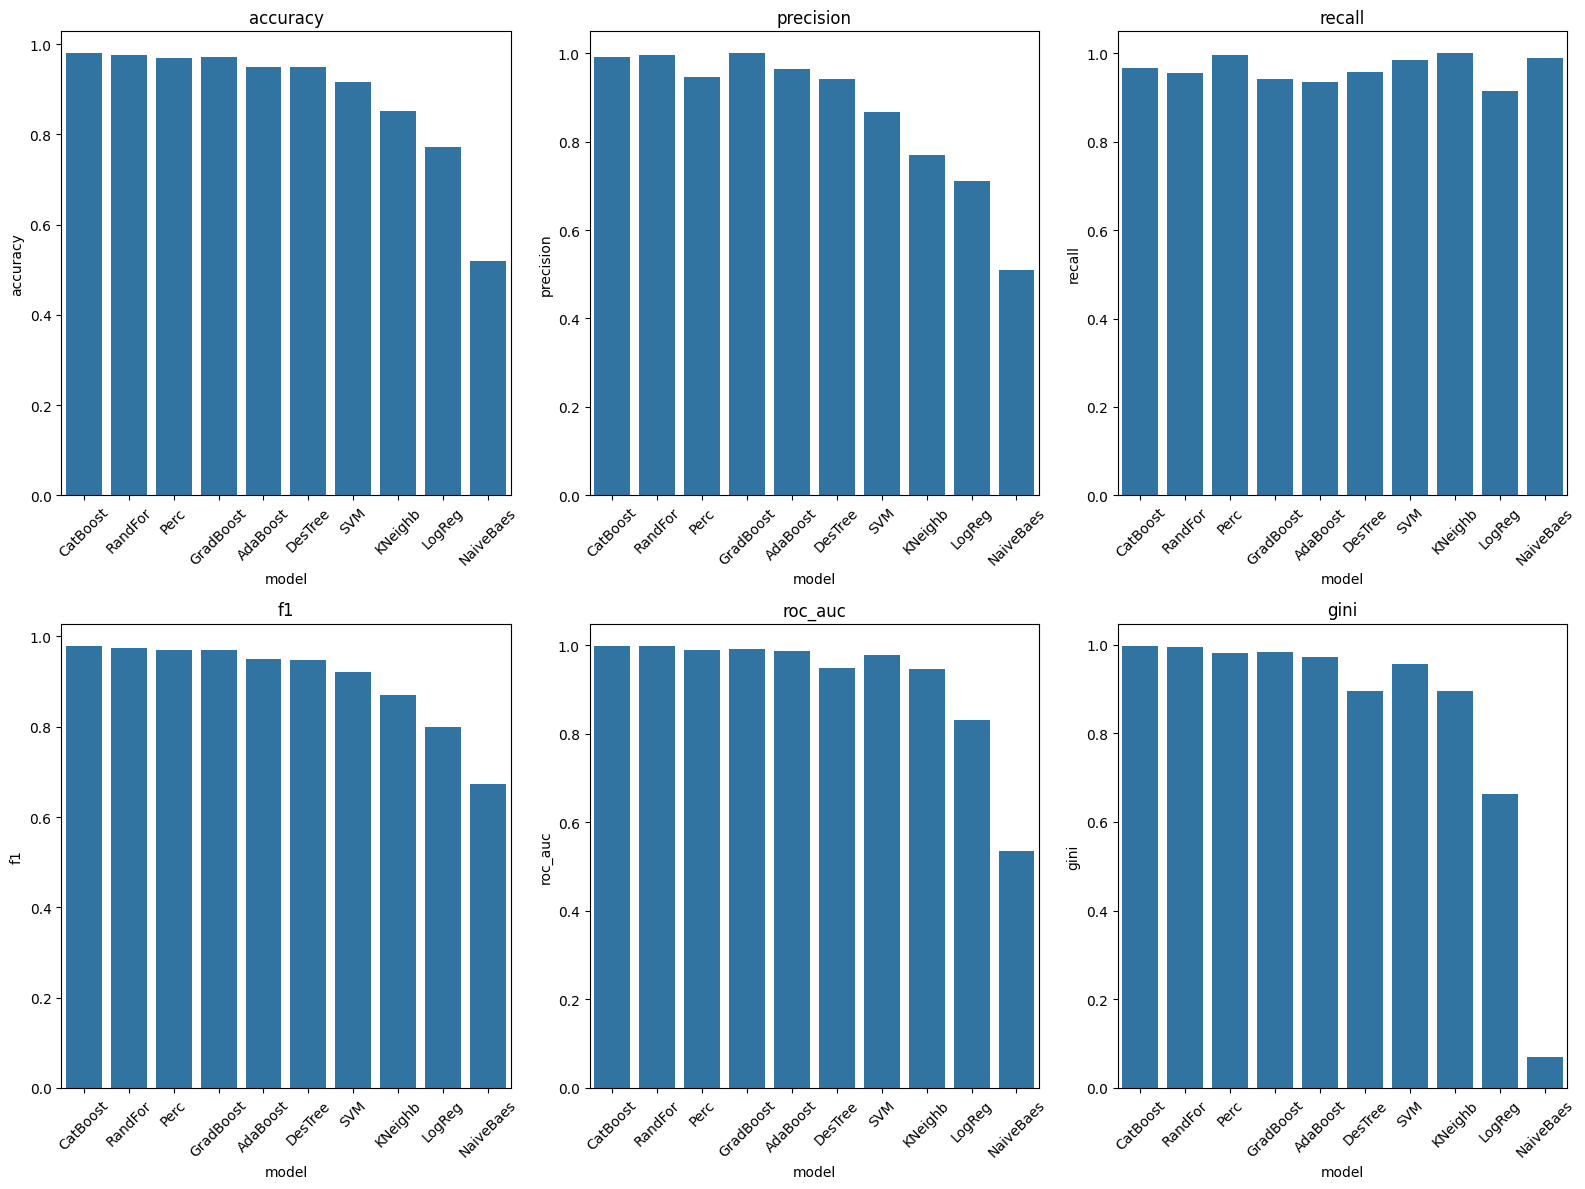

In [23]:
metrics = ["accuracy", "precision", "recall", "f1", "roc_auc", "gini"]
plt.figure(figsize=(16, 12))

for i, metric in enumerate(metrics):
    plt.subplot(2, 3, i+1)
    sns.barplot(x=results_df.index, y=results_df[metric])
    plt.title(f'{metric}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [24]:
import pickle

optimized_catboost.save_model("catboost_fraud_detection_model.cbm")

feature_names = list(X_train.columns)
with open('feature_names.pkl', 'wb') as f:
    pickle.dump(feature_names, f)